In [2]:
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../prepared_data/01_06_2021_to_20_06_2023_prepared_df_875.csv', parse_dates=['date'])

In [4]:
future = [[34.61515868],
       [37.0099619 ],
       [42.73361552],
       [62.91529822],
       [61.17317057],
       [41.437199  ],
       [26.25263917],
       [30.96251583],
       [26.34371769],
       [31.37132984],
       [50.78955257],
       [62.8560195 ],
       [44.11813986],
       [31.57581425],
       [29.67007804]]

In [5]:

def get_past_year_weekday(date_reference: datetime) -> datetime:
    """
    Calculate the date one year earlier, adjusted to correspond to the same day of the week as the reference date.
    Args:
        date_reference (datetime): The reference date.
    Returns:
        datetime: The adjusted date one year earlier, or None if the date is out of the valid range.
    Raises:
        pd.errors.OutOfBoundsDatetime: If the adjusted date is out of the valid range.
    """
    # Calculate the date one year earlier
    try:
        date_annee_precedente = date_reference - pd.DateOffset(years=1)
    except pd.errors.OutOfBoundsDatetime:
        print("La date un an auparavant est en dehors de la plage valide.")
        date_annee_precedente = None

    if date_annee_precedente:
        # Check that the days of the week match
        if date_annee_precedente.weekday() != date_reference.weekday():
            # Adjust the date one year earlier to correspond to the same day of the week as the reference date
            while date_annee_precedente.weekday() != date_reference.weekday():
                date_annee_precedente -= pd.DateOffset(days=1)

            # Print results
            print("Date de référence :", date_reference)
            print("Date un an auparavant (ajustée) :", date_annee_precedente)
        else:
            print("La date de référence et la date un an auparavant ont le même jour de la semaine.")
    else:
        print("La date de référence est en dehors de la plage valide.")
    return date_annee_precedente

In [6]:
def get_data_past_two_weeks(date_reference: datetime.date, period: int, df: pd.DataFrame):
    days_range = pd.date_range(end=date_reference, periods=period)
    df_filtered = df[df['date'].isin(days_range)]
    data_to_plot = df_filtered['nb_cars']
    return data_to_plot

In [40]:
def prepare_forecast_data_for_plotting(date_reference: datetime.date, period: int, predictions: list) -> pd.DataFrame:
    date_reference_plus_1_day = date_reference + timedelta(days=1)
    dates = pd.date_range(start=date_reference_plus_1_day, periods=period)
    df_future = pd.DataFrame(index=dates)
    df_future_values = pd.DataFrame(predictions, columns=['nb_cars'], index=pd.date_range(start=date_reference_plus_1_day, periods=len(future)))
    return df_future_values

In [41]:
def get_data_from_last_year(date_reference_past: datetime.date, period:int) -> pd.DataFrame:
    days_range_past = pd.date_range(end=date_reference_past, periods=period)
    df_filtered_past = df[df['date'].isin(days_range_past)]
    return df_filtered_past

In [42]:
def plot_graph(past_two_weeks_data, forecast_two_weeks_data, last_year_data, date_reference) -> None:
    fig, ax = plt.subplots(figsize=(12, 8))

    width = 0.35  # Largeur des barres

    # Position of bars for the first data set (Past)
    positions_past = range(len(past_two_weeks_data))
    bars_past = ax.bar(positions_past, past_two_weeks_data, width=width, label='Past two weeks')


    # Position of bars for the second data set (Future)
    positions_future = [p + len(past_two_weeks_data) + width for p in range(len(forecast_two_weeks_data))]
    bars_future = ax.bar(positions_future, forecast_two_weeks_data['nb_cars'], width=width, label='Forecast')

    # Line plot with data from the previous year at the same start date(adjust to weekday)
    ax.plot(list(range(29)), last_year_data['nb_cars'].iloc[1:], color='red', label='Last year')

    # Adjust x-axis labels
    dates_bis = pd.date_range(end=date_reference, periods=15)
    formatted_dates = [date.strftime('%Y-%m-%d') for date in dates_bis]  
    formatted_dates_future = [date.strftime('%Y-%m-%d') for date in forecast_two_weeks_data.index]

    ax.set_xticks(list(positions_past) + list(positions_future))
    ax.set_xticklabels(formatted_dates + list(formatted_dates_future), rotation=90)  

    ax.set_ylabel('Nb reservations')
    ax.set_xlabel('Forecast horizon')
    ax.legend(loc='best')

    plt.tight_layout()
    plt.show()

In [43]:
date_reference = pd.to_datetime('2023-06-05')
date_reference_past = get_past_year_weekday(date_reference)

Date de référence : 2023-06-05 00:00:00
Date un an auparavant (ajustée) : 2022-05-30 00:00:00


In [44]:
data_to_plot = get_data_past_two_weeks(date_reference, 15, df)

In [45]:
data_to_plot_forecast = prepare_forecast_data_for_plotting(date_reference, 15, future)

In [46]:
data_past = get_data_from_last_year(date_reference_past, period=30)

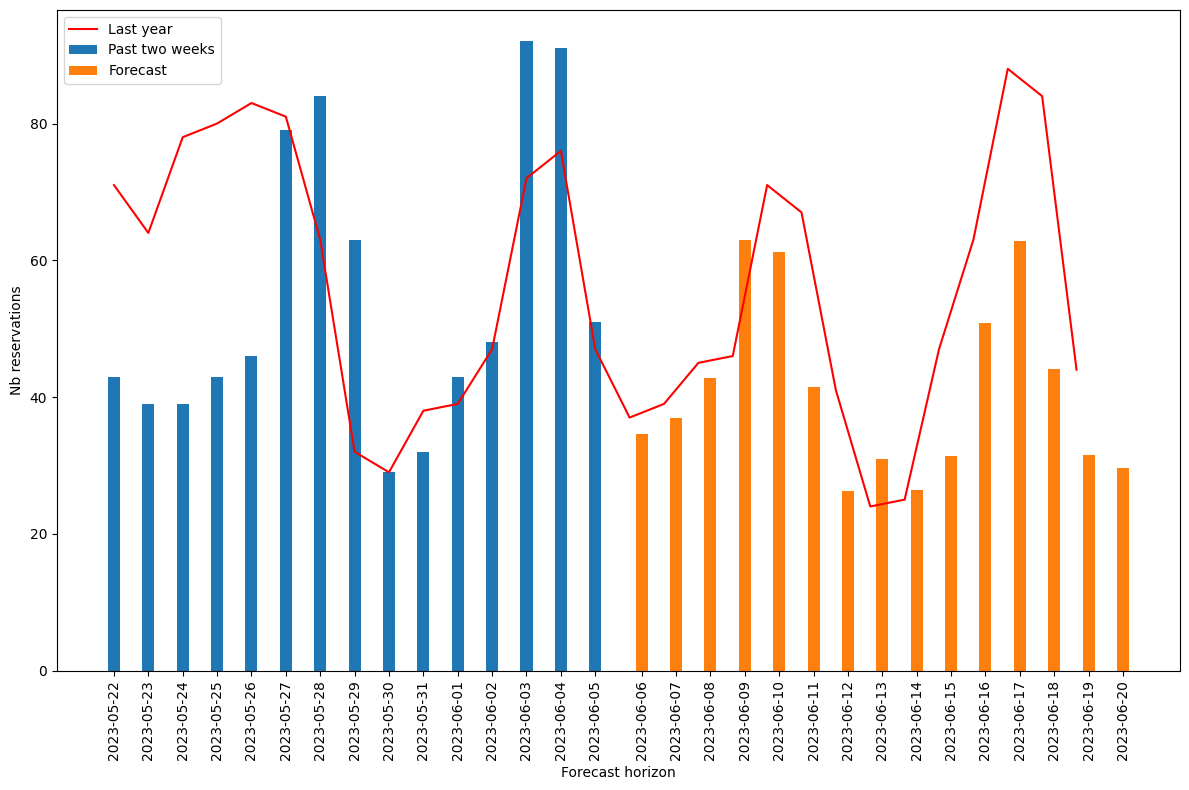

In [47]:
plot_graph(data_to_plot, data_to_plot_forecast, data_past, date_reference)